# DS 3000 - Practicum 2

**Student Names**: Ayush Zenith, Maxwell Cossill, Benjamin Lam, Spencer Safian

**Group Number**: 3

**Date**: 25th February 2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

Note:

* Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
* Use markdown cells to explain your observations about the data.
* Include the names of all teammates on all submissions
* Ensure that your Python code is in a code cell and that it executes without errors.


In this practicum, you will work with data from the Federal Aviation Administration Wildlife Strike DatabaseLinks to an external site. which contains records of reported strikes to civil aircraft in the United States from 1990 to 2024. These incidents have resulted in the loss of lives and machinery. Various analyses shows increased incidents are attributed to environmental factors, changes to wildlife population, increases in the number of aircraft, among other factors.

The dataset contains aircraft, and a description of the wildlife incident that occurred. The data contains approximately 100 fields but I guarantee that you will only need about 15% of those columns. After reviewing the requirements for the practicum, you are welcome and encourage to drop any columns that are not needed for your analysis. For more information on the dataset and to learn more about the description of the fields, read the [dataset documentation](fieldlist.pdf).

## Question 1: The DS Problem

1. In your own words, formulate the Data Science problem that you were given.


The data science problem given involves analyzing the FAA Wildlife Strike Database to identify patterns, trends, and significant factors related to wildlife strikes on aircraft in the United States from 1990 to 2024. Specifically, we need to:

1. Preprocess: Clean and prepare the dataset for analysis by addressing issues like missing values and data types
2. Perform exploratory data analysis to understand trends
3. Conduct statistical hypothesis testing to determine significant relationships between variables
4. Develop a linear regression model to predict wildlife strike incidents in specific FAA regions
5. Summarize key findings

The ultimate goal is to extract actionable findings and insights from this historical data  on wildlife strikes.

## Question 2 — Clean the data (10 pts)

Load the data using pandas and inspect it.

1. Perform the initial inspection of the data, its shape, types, etc.
2. Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.
3. Prepare meaningful* summary statistics for 3 continuous variables and 3 categorical variables.
    
    Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.


In [191]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

### 2.1

In [192]:
df = pd.read_csv('Bird_Strikes_1990_2023.csv')
df.head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_31984\451107580.py:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bird_Strikes_1990_2023.csv')


,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


In [193]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

In [194]:
print("Dataset Shape:", df.shape)
print("\nMissing Values Summary:")
print(df.isnull().sum().sort_values(ascending=False)[:40])


Dataset Shape: (288810, 100)

Missing Values Summary:
NR_FATALITIES            288786
NR_INJURIES              288534
BIRD_BAND_NUMBER         288420
EFFECT_OTHER             286589
ENG_4_POS                285520
COST_OTHER_INFL_ADJ      284050
COST_OTHER               284050
ENROUTE_STATE            283773
COST_REPAIRS_INFL_ADJ    283770
COST_REPAIRS             283770
ENG_3_POS                275730
AOS                      274614
LOCATION                 254871
OTHER_SPECIFY            250344
SPEED                    194573
NUM_SEEN                 194037
FLT                      159561
PRECIPITATION            154948
SKY                      149428
EFFECT                   144996
HEIGHT                   140003
TIME                     125177
TIME_OF_DAY              122416
REG                      116267
PHASE_OF_FLIGHT          110967
EMO                      102054
DAMAGE_LEVEL             101495
DISTANCE                 100576
AMO                       98651
ENG_2_POS         

In [195]:
df.columns

Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE',
       'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'ENROUTE_STATE', 'OPID',
       'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO',
       'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS',
       'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED',
       'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER',
       'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD',
       'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1',
       'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3',
       'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP',
       'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE',
       'STR_LG', 'DAM_L

### 2.2

In [196]:

df['DAMAGE_LEVEL'] = df['DAMAGE_LEVEL'].fillna('Unknown')
df['DAMAGE_LEVEL'] = df['DAMAGE_LEVEL'].astype('category')

df['AC_CLASS'] = df['AC_CLASS'].fillna('Unknown')
df['AC_CLASS'] = df['AC_CLASS'].astype('category')

df['AC_MASS'] = df['AC_MASS'].fillna('unknown')
df['AC_MASS'] = df['AC_MASS'].astype('category')

df['TYPE_ENG'] = df['TYPE_ENG'].fillna('unknown')
df['TYPE_ENG'] = df['TYPE_ENG'].astype('category')

df['OPERATOR'] = df['OPERATOR'].fillna('unknown')
df['OPERATOR'] = df['OPERATOR'].astype('category')

df['EMA'] = df['EMA'].fillna('unknown')
df['EMA'] = df['EMA'].astype('category')

df['EMO'] = df['EMO'].fillna('unknown')
df['EMO'] = df['EMO'].astype('category')

df['ENG_1_POS'] = df['ENG_1_POS'].fillna('unknown')
df['ENG_1_POS'] = df['ENG_1_POS'].astype('category')

df['ENG_2_POS'] = df['ENG_2_POS'].fillna('unknown')
df['ENG_2_POS'] = df['ENG_2_POS'].astype('category')

df['ENG_3_POS'] = df['ENG_3_POS'].fillna('unknown')
df['ENG_3_POS'] = df['ENG_3_POS'].astype('category')

df['ENG_4_POS'] = df['ENG_4_POS'].fillna('unknown')
df['ENG_4_POS'] = df['ENG_4_POS'].astype('category')

df['PHASE_OF_FLIGHT'] = df['PHASE_OF_FLIGHT'].fillna('unknown')
df['PHASE_OF_FLIGHT'] = df['PHASE_OF_FLIGHT'].astype('category')

df['SIZE'] = df['SIZE'].fillna('unknown')
df['SIZE'] = df['SIZE'].astype('category')


In [197]:
# Drop duplicate rows
df = df.drop_duplicates()
print(df.shape)

# Drop columns with less than 25% non null values
threshold = len(df) * 0.25
df_cleaned = df.dropna(axis=1, thresh=threshold)
print("\nShape after dropping columns with missing values:", df_cleaned.shape)

# Drop rows with more than 70% missing values
threshold = len(df_cleaned.columns) * 0.70
df_cleaned = df_cleaned.dropna(axis=0, thresh=threshold)
print("\nShape after dropping rows with missing values:", df_cleaned.shape)

(288810, 100)

Shape after dropping columns with missing values: (288810, 88)

Shape after dropping rows with missing values: (288810, 88)


In [198]:
df_cleaned.columns


Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE',
       'RUNWAY', 'STATE', 'FAAREGION', 'OPID', 'OPERATOR', 'REG', 'FLT',
       'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS',
       'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS',
       'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY',
       'PRECIPITATION', 'INGESTED_OTHER', 'INDICATED_DAMAGE', 'DAMAGE_LEVEL',
       'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE',
       'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2',
       'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4',
       'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT',
       'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL',
       'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'EFFECT',
       'SPECIES_ID', 'SPECIES',

In [199]:
# Convert INCIDENT_DATE to datetime
df_cleaned['INCIDENT_DATE'] = pd.to_datetime(df_cleaned['INCIDENT_DATE'])

# Clean HEIGHT field - replace invalid values with 0
df_cleaned.loc[df_cleaned['HEIGHT'] < 0, 'HEIGHT'] = 0

# Clean SPEED field - replace invalid values with 0
df_cleaned.loc[df_cleaned['SPEED'] < 0, 'SPEED'] = 0

# Standardize airport names
df_cleaned['AIRPORT'] = df_cleaned['AIRPORT'].str.strip().str.upper()

# Cleaned for 3.6
df_cleaned = df_cleaned.dropna(subset=['TIME_OF_DAY', 'INCIDENT_YEAR'])


In [200]:
df_cleaned

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,NUM_SEEN,NUM_STRUCK,SIZE,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
5,608247,1991-05-06,5,1991,NaN,Day,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,...,1,1,Medium,SOURCE = FAA FROM 3830 /Legacy Record=100006/,REDACTED,REDACTED,Other,Pilot,11/21/1997,False
6,608248,1993-11-05,11,1993,NaN,Dawn,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,More than 100,11-100,Medium,"THIS MAY BE DUPL STRIKE FOR AIR MIDWEST, BUT T...",REDACTED,REDACTED,FAA Form 5200-7,NaN,5/13/1998,False
8,608250,1990-09-19,9,1990,NaN,Day,KDFW,DALLAS/FORT WORTH INTL ARPT,32.89595,-97.03720,...,2-10,2-10,Small,/Legacy Record=100009/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,1/21/1999,False
9,608251,1992-05-03,5,1992,NaN,Day,KSJC,NORMAN Y. MINETA SAN JOSE INTL ARPT,37.36186,-121.92901,...,1,1,Small,A/C = FAIRCHILD METRO II (5/8/14 UPDATED A/C) ...,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/8/2014,False
10,608253,1990-08-07,8,1990,20:25,Night,KSTL,LAMBERT-ST LOUIS INTL,38.74769,-90.35999,...,1,1,Large,OPER = DOUG HANN (3/1/12 UPDATED ID) /Legacy R...,REDACTED,REDACTED,FAA Form 5200-7,NaN,3/1/2012,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288795,1472236,2023-08-28,8,2023,23:20,Night,KRSW,SOUTHWEST FLORIDA INTL ARPT,26.53617,-81.75517,...,1,1,Small,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,11/17/2023,False
288798,1472241,2023-08-28,8,2023,11:25,Night,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,NaN,1,Medium,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,11/17/2023,False
288804,1472251,2023-08-28,8,2023,23:00,Night,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,1,1,Small,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,11/17/2023,False
288807,1472257,2023-08-28,8,2023,07:14,Dusk,KDTW,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,...,1,1,Small,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,11/17/2023,False


### 2.3

In [201]:
# Continuous variables
continuous_vars = ['HEIGHT', 'SPEED', 'DISTANCE']
print("\nSummary Statistics for Continuous Variables:")
print(df_cleaned[continuous_vars].describe().round(2))

# Categorical variables
categorical_vars = ['DAMAGE_LEVEL', 'PHASE_OF_FLIGHT', 'SIZE']
print("\nSummary Statistics for Categorical Variables:")
for var in categorical_vars:
    print(f"\n{var} Distribution:")
    print(df_cleaned[var].value_counts(normalize=True).round(3) * 100)





Summary Statistics for Continuous Variables:
          HEIGHT     SPEED   DISTANCE
count  136762.00  89778.00  101005.00
mean      857.79    142.10       1.40
std      1819.24     46.41       4.56
min         0.00      0.00       0.00
25%         0.00    120.00       0.00
50%        50.00    140.00       0.00
75%       900.00    160.00       0.00
max     31300.00   1250.00      99.00

Summary Statistics for Categorical Variables:

DAMAGE_LEVEL Distribution:
N          78.7
Unknown    11.7
M           4.2
M?          3.3
S           2.1
D           0.0
Name: DAMAGE_LEVEL, dtype: float64

PHASE_OF_FLIGHT Distribution:
Approach        40.7
Landing Roll    17.5
Take-off Run    16.2
Climb           14.6
unknown          4.0
En Route         3.0
Departure        1.4
Descent          1.2
Local            0.6
Arrival          0.4
Taxi             0.4
Parked           0.1
Name: PHASE_OF_FLIGHT, dtype: float64

SIZE Distribution:
Small      57.3
Medium     24.5
unknown    10.7
Large       7.5
N

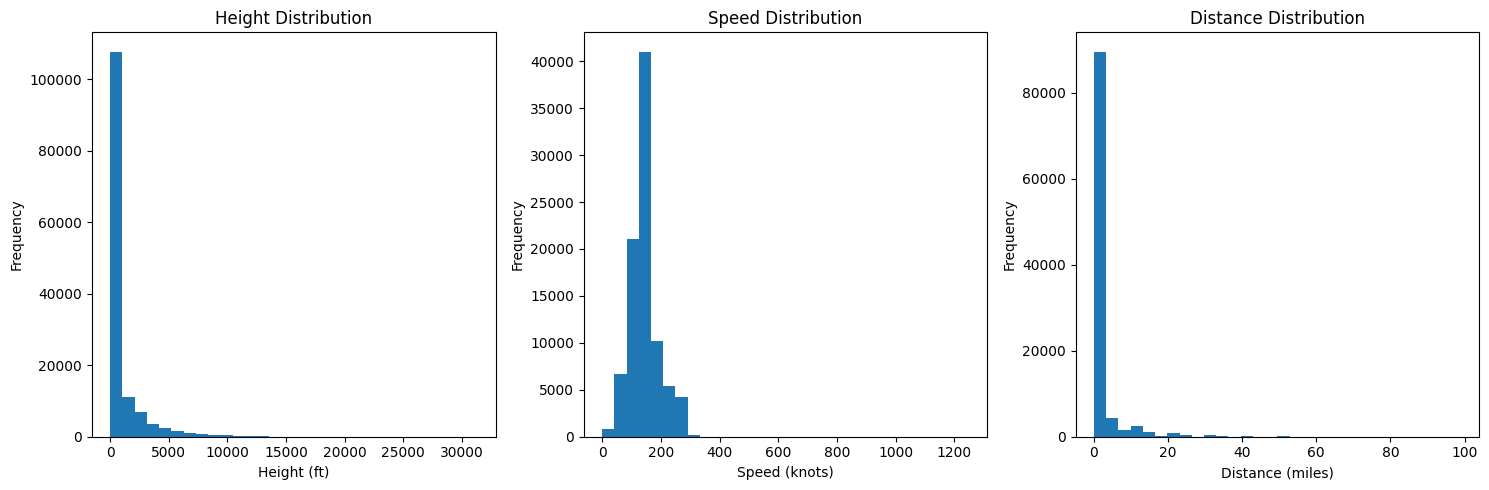

In [202]:
plt.figure(figsize=(15, 5))

# Height distribution
plt.subplot(1,3,1)
plt.hist(df_cleaned['HEIGHT'].dropna(), bins=30)
plt.title('Height Distribution')
plt.xlabel('Height (ft)')
plt.ylabel('Frequency')

# Speed distribution
plt.subplot(1,3,2)
plt.hist(df_cleaned['SPEED'].dropna(), bins=30)
plt.title('Speed Distribution')
plt.xlabel('Speed (knots)')
plt.ylabel('Frequency')

# Distance distribution
plt.subplot(1,3,3)
plt.hist(df_cleaned['DISTANCE'].dropna(), bins=30)
plt.title('Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most burd strikes occur at lower heights as seen by the height distribution. There is a very high concentration of bird strikes near the ground. Most strikes occur between 100-250 knots and very few occur past 400 knots. The vast majority of strikes happen within 5 miles of the airport. with a very high concentration of strikes between 0-2 miles. 

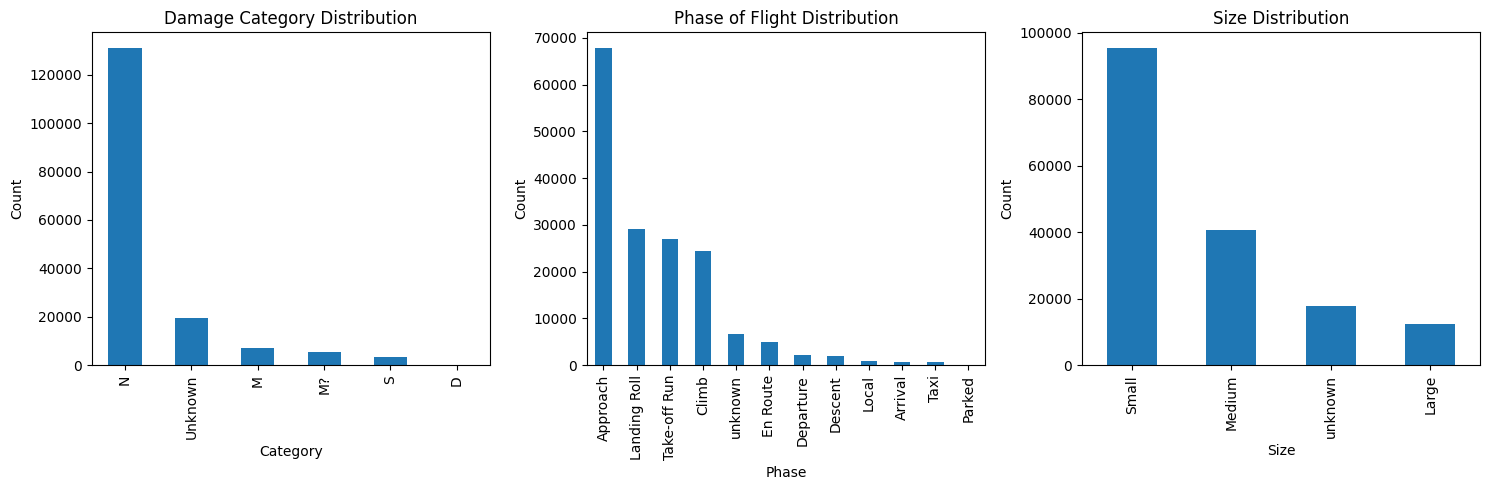

In [203]:
plt.figure(figsize=(15, 5))

# Damage category distribution
plt.subplot(1,3,1)
df_cleaned['DAMAGE_LEVEL'].value_counts().plot(kind='bar')
plt.title('Damage Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Phase of flight distribution
plt.subplot(1,3,2)
df_cleaned['PHASE_OF_FLIGHT'].value_counts().plot(kind='bar')
plt.title('Phase of Flight Distribution')
plt.xlabel('Phase')
plt.ylabel('Count')

# Size distribution
plt.subplot(1,3,3)
df_cleaned['SIZE'].value_counts().plot(kind='bar')
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



Ignoring the unknown values, the most common damage level is none, the most common phase of flight is approach, and the most common size of birds is small. After no damage minor damage follows but with a much lower frequency suggesting wildlife strikes cause no or minimal damage to aircraft. The phase of flight distribution shows that the most common phase of flight is approach, followed by landing roll. This suggests that bird strikes are most common during the approach and landing phases of flight which makes sense since this is when aircraft are at lower altitudes where birds are present. It also seems like there is a relative abundance of small birds in most environments which could explain why there are so many small bird strikes.

## Question 3 — Perform Exploratory Data Analysis (40 pts)

Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

1. Analyze the proportion of incidents that occur each year.
2. Evaluate the distribution of bird strikes in each state and display the top 20 states.
3. What is the most common bird species that are involved in bird strikes.
4. Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
5. Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
6. Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.


### 3.1







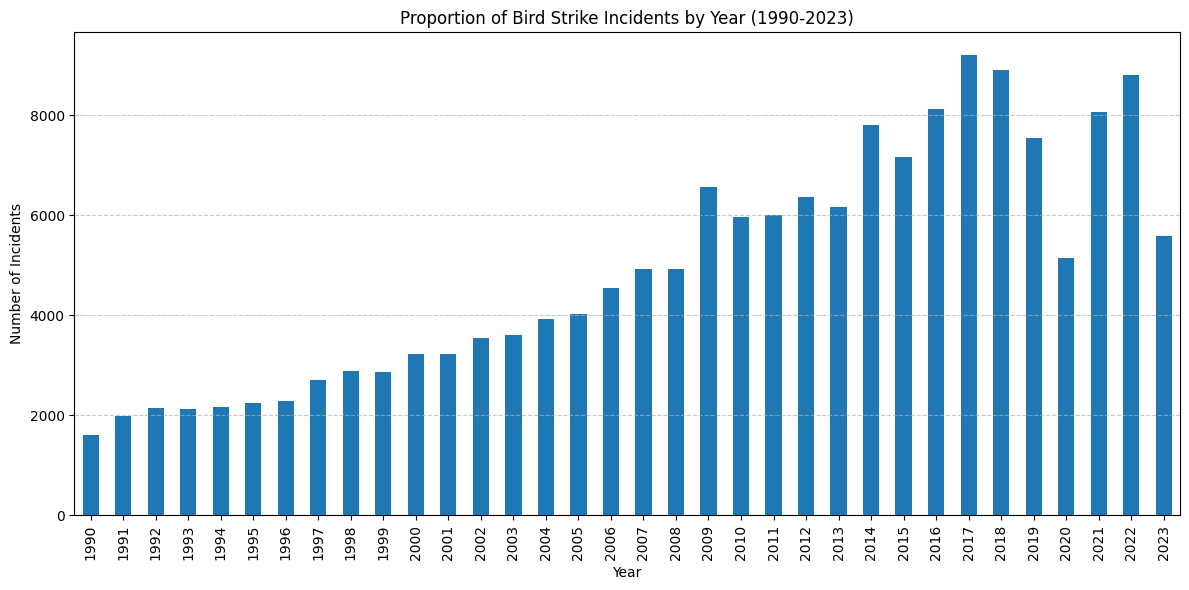

In [204]:
plt.figure(figsize=(12, 6))
yearly_incidents = df_cleaned['INCIDENT_YEAR'].value_counts().sort_index()
yearly_incidents.plot(kind='bar')
plt.title('Proportion of Bird Strike Incidents by Year (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [205]:
# Percentage of total incidents for each year
total_incidents = yearly_incidents.sum()
yearly_percentage = (yearly_incidents / total_incidents * 100).round(2)
print("Percentage of incidents by year:")
for year, percentage in yearly_percentage.items():
    print(f"{year}: {percentage}%")

Percentage of incidents by year:
1990: 0.97%
1991: 1.19%
1992: 1.28%
1993: 1.28%
1994: 1.31%
1995: 1.35%
1996: 1.37%
1997: 1.62%
1998: 1.73%
1999: 1.72%
2000: 1.94%
2001: 1.93%
2002: 2.13%
2003: 2.17%
2004: 2.35%
2005: 2.42%
2006: 2.73%
2007: 2.96%
2008: 2.96%
2009: 3.94%
2010: 3.59%
2011: 3.6%
2012: 3.82%
2013: 3.71%
2014: 4.7%
2015: 4.31%
2016: 4.88%
2017: 5.53%
2018: 5.36%
2019: 4.53%
2020: 3.09%
2021: 4.85%
2022: 5.29%
2023: 3.36%


Seems like the number of bird strikes has been increasing over time as the bar chart shows a clear upward trend in bird strikes. The most dramatic growth occurred between 2010 and 2019, with incidents reaching a peak of nearly 17,500 in 2019. There's a noticeable dip in 2020, likely due to reduced air travel during the COVID-19 pandemic but the number of bird strikes recovered again in 2021 and 2022 but slightly decreases again in 2023. Looking at the percentage of incidents by year, we can see that the percentage of incidents has been relatively consistent over time with a slight increase other than 2019 and 2022 with higher increase in percentage in comparison to other years.

### 3.2

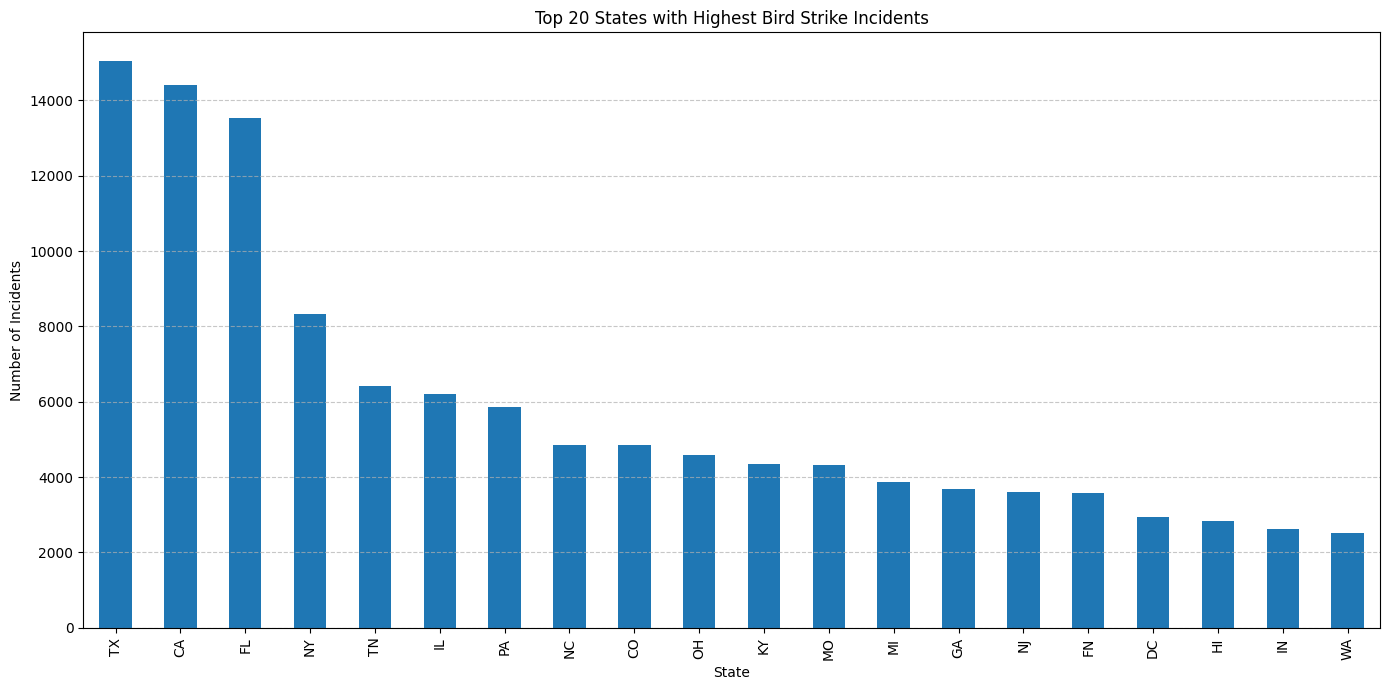

In [206]:
plt.figure(figsize=(14, 7))
state_counts = df_cleaned['STATE'].value_counts().head(20)
state_counts.plot(kind='bar')
plt.title('Top 20 States with Highest Bird Strike Incidents')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [207]:
print("Top 20 states with the highest number of bird strikes:")
for state, count in state_counts.items():
    print(f"{state}: {count} incidents")

Top 20 states with the highest number of bird strikes:
TX: 15054 incidents
CA: 14404 incidents
FL: 13541 incidents
NY: 8319 incidents
TN: 6415 incidents
IL: 6204 incidents
PA: 5859 incidents
NC: 4857 incidents
CO: 4844 incidents
OH: 4583 incidents
KY: 4359 incidents
MO: 4316 incidents
MI: 3873 incidents
GA: 3679 incidents
NJ: 3596 incidents
FN: 3576 incidents
DC: 2942 incidents
HI: 2845 incidents
IN: 2617 incidents
WA: 2506 incidents


Texas seems to have the highest number of bird strikes followed by Florida and California with Texas having significantly more bird strikes than the other two states. After the first 6 states (Texas, Florida, California, New York, Colorado, and Illinois), the number of bird strikes decreases rapidly with all having fewer than 10000 incidents each. Contributing factors could be air traffic volume out of these states, bird migration patterns, climate, and possibly even reporting practices/biases.

### 3.3

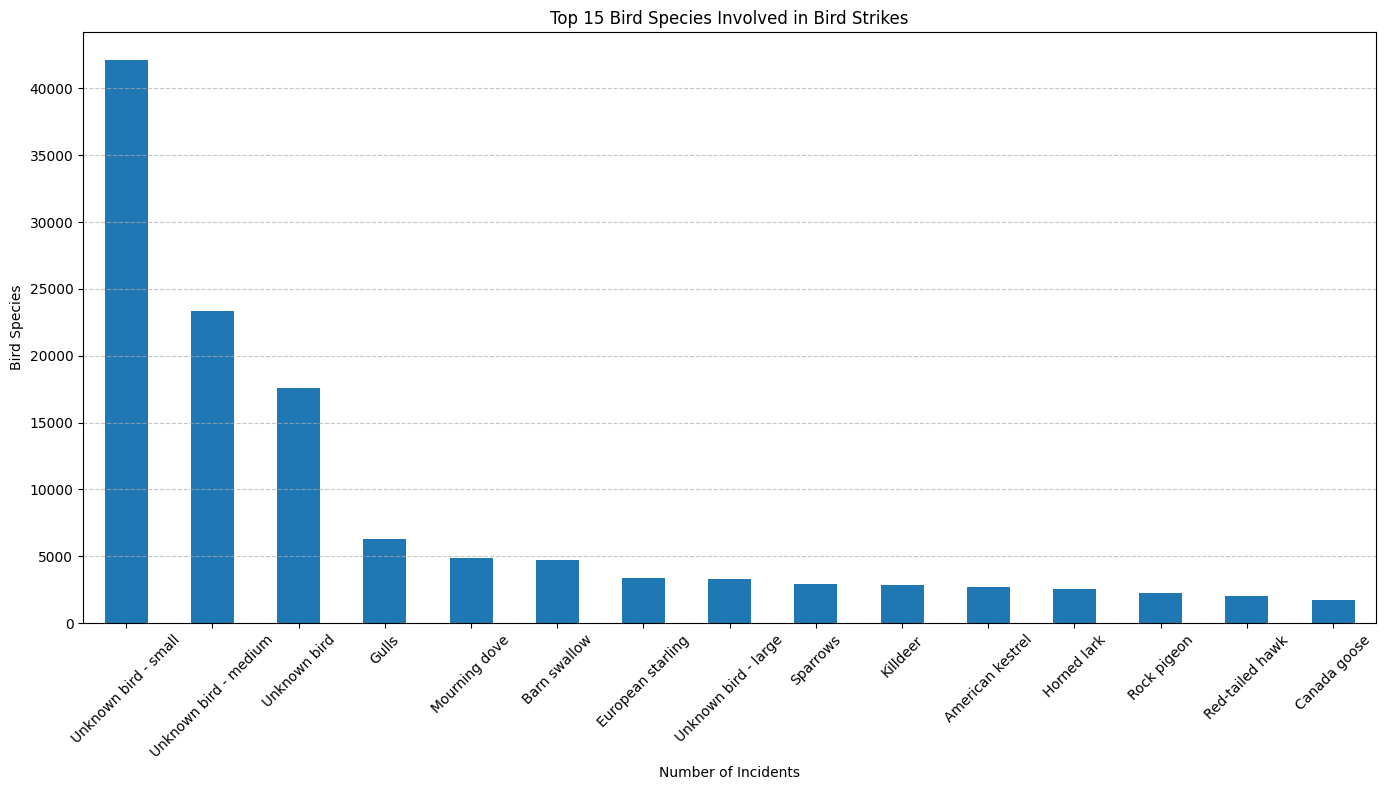

In [208]:
plt.figure(figsize=(14, 8))
species_counts = df_cleaned['SPECIES'].value_counts().head(15)  # Top 15 species
species_counts.plot(kind='bar')
plt.title('Top 15 Bird Species Involved in Bird Strikes')
plt.xlabel('Number of Incidents')
plt.ylabel('Bird Species')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [209]:
print("Most common bird species involved in bird strikes:")
for species, count in species_counts.head(5).items():
    print(f"{species}: {count} incidents")

Most common bird species involved in bird strikes:
Unknown bird - small: 42095 incidents
Unknown bird - medium: 23332 incidents
Unknown bird: 17561 incidents
Gulls: 6315 incidents
Mourning dove: 4886 incidents


The top 3 bird species seem to be unknown/unidentified species. The first identified species that is most commonly involved in bird strikes is mourning dove with around 15000 incidents, followed by barn swallow with a little under 10000 incidents. There doesnt seem to be a very large difference between number of incidents per species other than the difference between mourning dove and barn swallow.

### 3.4


In [210]:
# filter data for the last 10 years
current_year = df_cleaned['INCIDENT_YEAR'].max()
last_10_years = list(range(current_year - 9, current_year + 1))
last_10_years_data = df_cleaned[df_cleaned['INCIDENT_YEAR'].isin(last_10_years)]

In [211]:
# Pivot table for damage by year and phase of flight
# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
damage_by_phase_year = pd.crosstab(
    [last_10_years_data['INCIDENT_YEAR'], last_10_years_data['PHASE_OF_FLIGHT']], 
    last_10_years_data['DAMAGE_LEVEL']
)

damage_by_phase_year

DAMAGE_LEVEL                   D    M  M?     N   S  Unknown
INCIDENT_YEAR PHASE_OF_FLIGHT                               
2014          Approach         0  110  54  3058  61      146
              Arrival          0    0   0    23   1        7
              Climb            1   52  26   930  43      113
              Departure        0    1   1   118   1       46
              Descent          0    2   0    74   0        2
...                           ..  ...  ..   ...  ..      ...
2023          Local            0    0   1    25   0       22
              Parked           0    0   0     4   0        0
              Take-off Run     0    3  31   617   2      357
              Taxi             0    0   0    19   0        5
              unknown          0    0   0     8   0       17

[120 rows x 6 columns]

In [212]:
# Combine all damage categories into a single "Damage" column
damage_by_phase_year['Total Damage'] = damage_by_phase_year['S'] + damage_by_phase_year['M'] + damage_by_phase_year['D'] + damage_by_phase_year['M?']

# Get the top 5 phases
top_phases = damage_by_phase_year.groupby(level=1)['Total Damage'].sum().nlargest(5).index

top_phases

CategoricalIndex(['Approach', 'Climb', 'En Route', 'Take-off Run',
                  'Landing Roll'],
                 categories=['Approach', 'Arrival', 'Climb', 'Departure', ..., 'Parked', 'Take-off Run', 'Taxi', 'unknown'], ordered=False, dtype='category', name='PHASE_OF_FLIGHT')

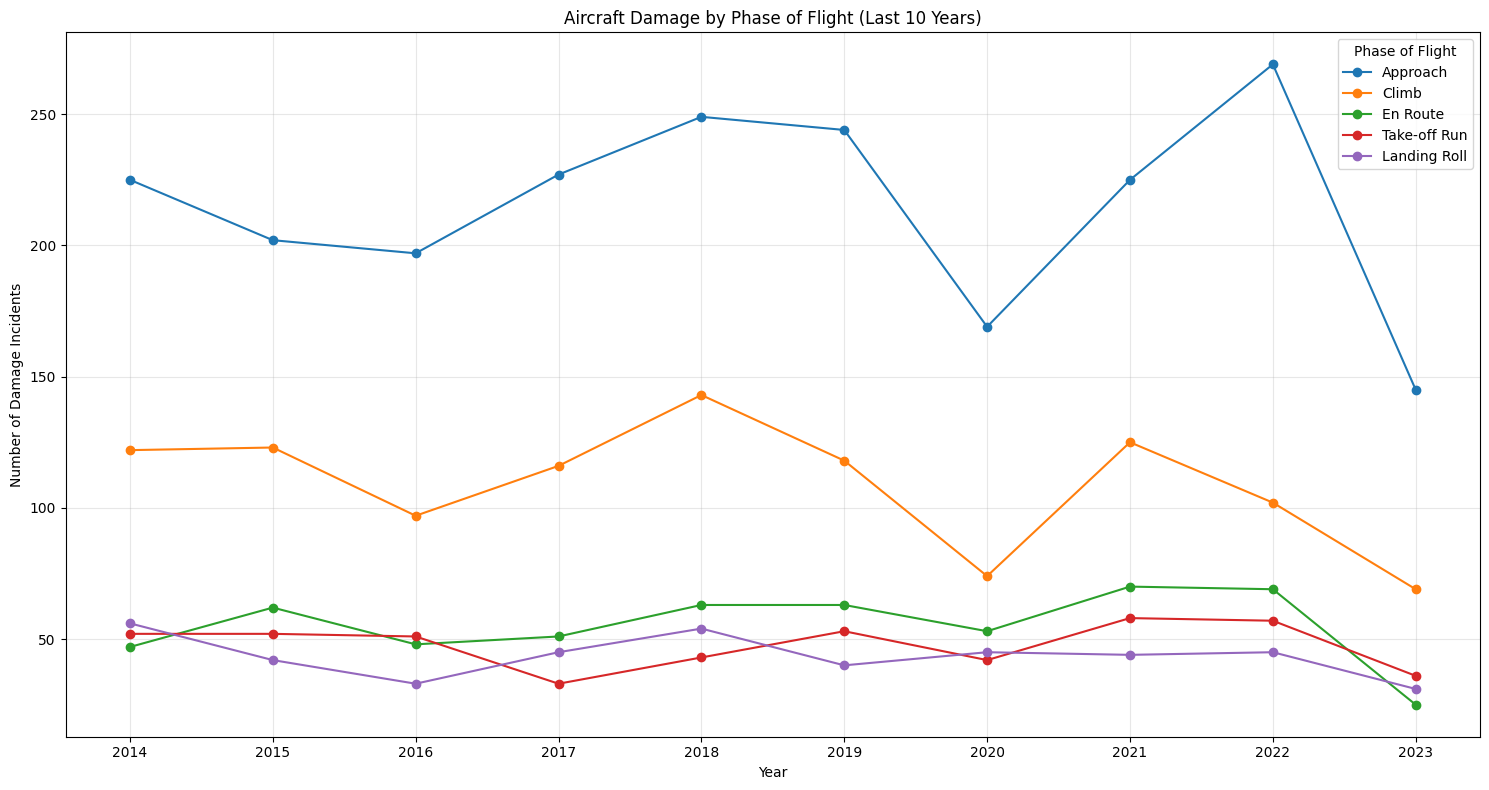

In [213]:

# Plot the damage trends for the top phases
plt.figure(figsize=(15, 8))
for phase in top_phases:
    try:
        phase_data = damage_by_phase_year.loc[(slice(None), phase), 'Total Damage']
        phase_data = phase_data.reset_index(level=1, drop=True)
        plt.plot(phase_data.index, phase_data.values, marker='o', label=phase)
    except:
        continue

plt.title('Aircraft Damage by Phase of Flight (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Damage Incidents')
plt.legend(title='Phase of Flight')
plt.grid(True, alpha=0.3)
plt.xticks(last_10_years)
plt.tight_layout()
plt.show()

In [214]:
# Print summary statistics
print("Summary of damage incidents by phase of flight over the last 10 years:")
damage_summary = damage_by_phase_year.groupby(level=1)['Total Damage'].sum().sort_values(ascending=False).head(5)
for phase, count in damage_summary.items():
    print(f"{phase}: {count} damage incidents")

Summary of damage incidents by phase of flight over the last 10 years:
Approach: 2152 damage incidents
Climb: 1089 damage incidents
En Route: 551 damage incidents
Take-off Run: 477 damage incidents
Landing Roll: 435 damage incidents


The approach phase consistently has the highest number of damage incidents across all years, typically 2-3 times higher than any other flight phase. There was a general upward trend in damage incidents from 2014 to 2019 across most flight phases. However, there was a sharp decrease in damage incidents in 2020 likely due to reduced air travel during the COVID-19 pandemic. After approach, the climb phase consistently shows the second-highest damage incidents, followed by unknown phases, en route, and take-off run. The ranking seems consistent across all years except 2019 where unknown phase had dropped to the lowest but it came back up to its original position in 2020 and this could just be due to there being very few incidents in 2019.

### 3.5

In [215]:
# Pivot table for incidents by year and month
monthly_incidents = pd.crosstab(
    last_10_years_data['INCIDENT_YEAR'], 
    last_10_years_data['INCIDENT_MONTH']
)


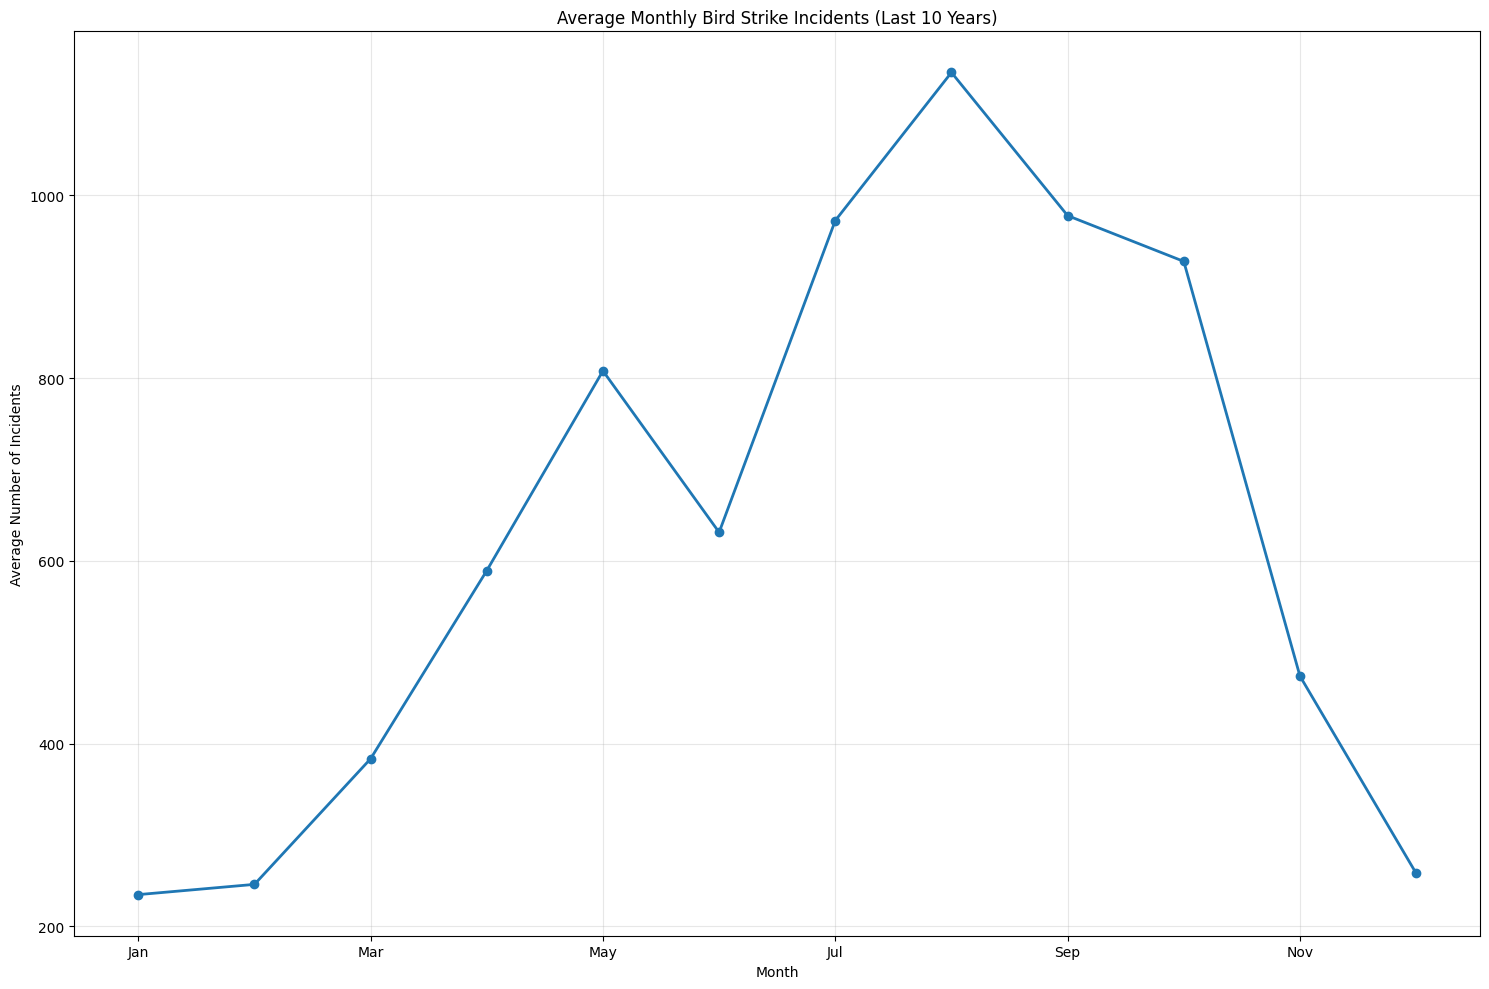

In [216]:

# Plot line chart to show monthly patterns across years
plt.figure(figsize=(15, 10))
monthly_avg = monthly_incidents.mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.plot(kind='line', marker='o', linewidth=2)
plt.title('Average Monthly Bird Strike Incidents (Last 10 Years)')
plt.xlabel('Month')
plt.ylabel('Average Number of Incidents')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


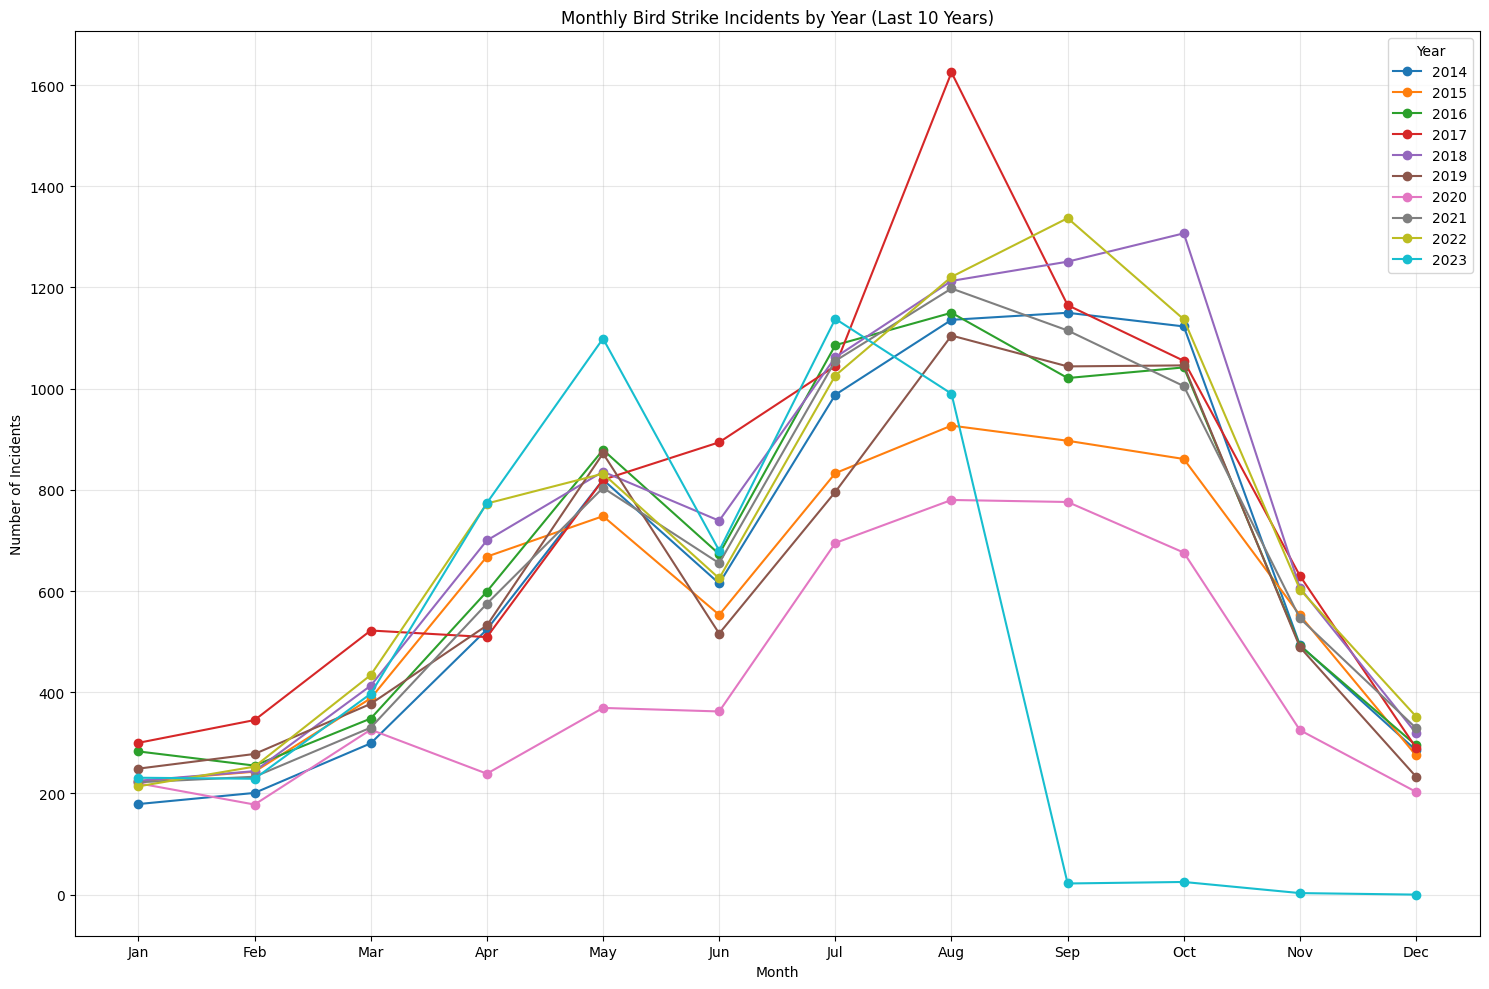

In [217]:
# Check if the monthly distribution has changed over the years
plt.figure(figsize=(15, 10))
for year in last_10_years:
    if year in monthly_incidents.index:
        year_data = monthly_incidents.loc[year]
        year_data.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        plt.plot(year_data.index, year_data.values, marker='o', label=str(year))

plt.title('Monthly Bird Strike Incidents by Year (Last 10 Years)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Seems like July to August is typically the peak for bird strikes and this seems to be consistent across all years. Winter months (December-February) show the lowest incident rates. A steady increase begins in March and continues through spring. May shows a notable spike before a slight dip in June. After the August peak, incidents gradually decrease through fall and winter. The monthly distribution seems to be mostly consistent across all years and the curve maintains its shape with the peaks and valleys occuring around the same/similar time each year. 2023 data shows an interesting anomaly with very high counts in early months (particularly May) but missing data/abnormally low counts for September to December.

### 3.6

In [218]:
# Bird strike incidents by time of day over the years
time_incidents = pd.crosstab(
    df_cleaned['INCIDENT_YEAR'], 
    df_cleaned['TIME_OF_DAY']
)

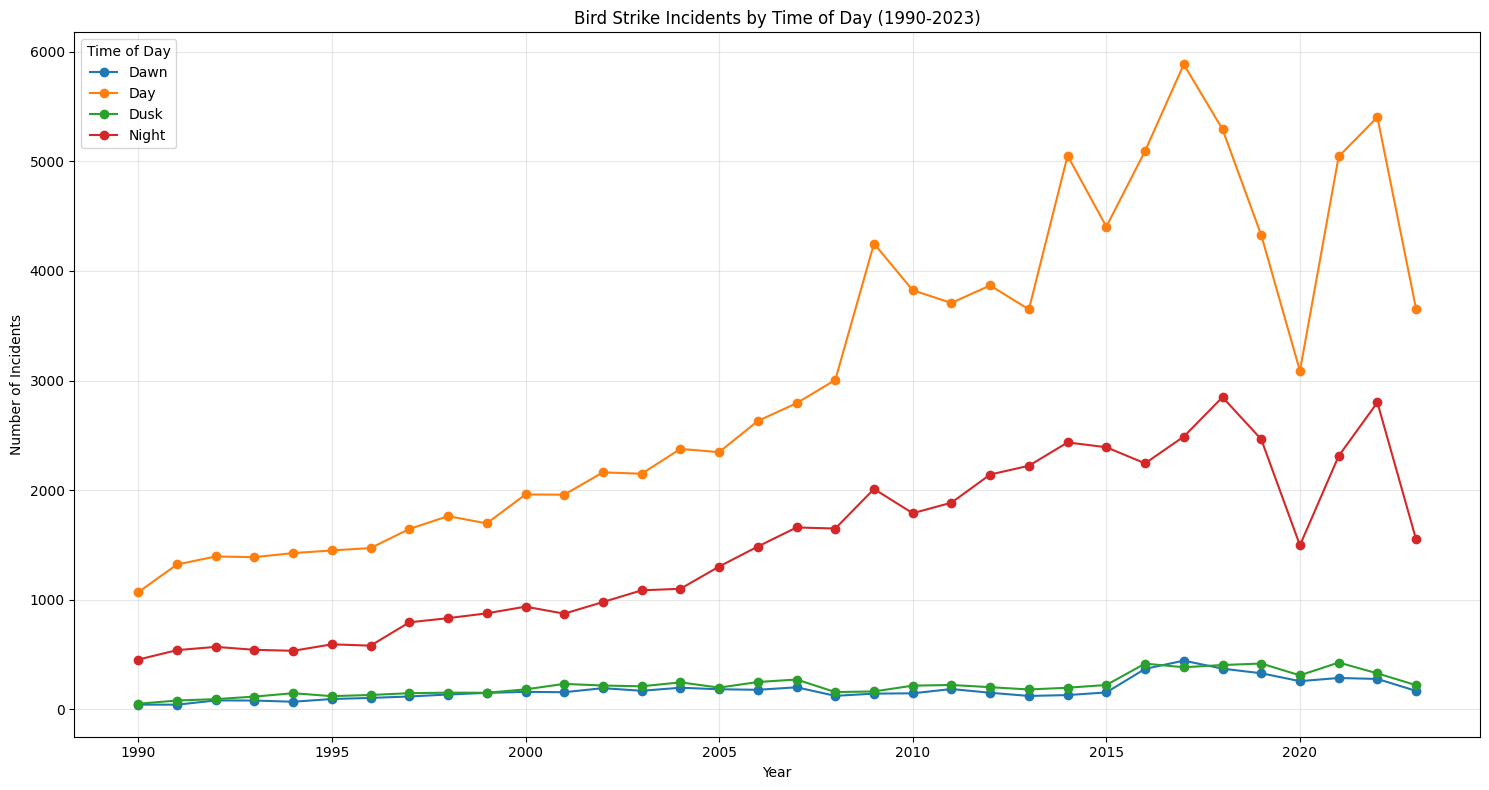

In [219]:
plt.figure(figsize=(15, 8))
for time_of_day in time_incidents.columns:
    plt.plot(time_incidents.index, time_incidents[time_of_day], marker='o', label=time_of_day)

plt.title('Bird Strike Incidents by Time of Day (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Time of Day')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


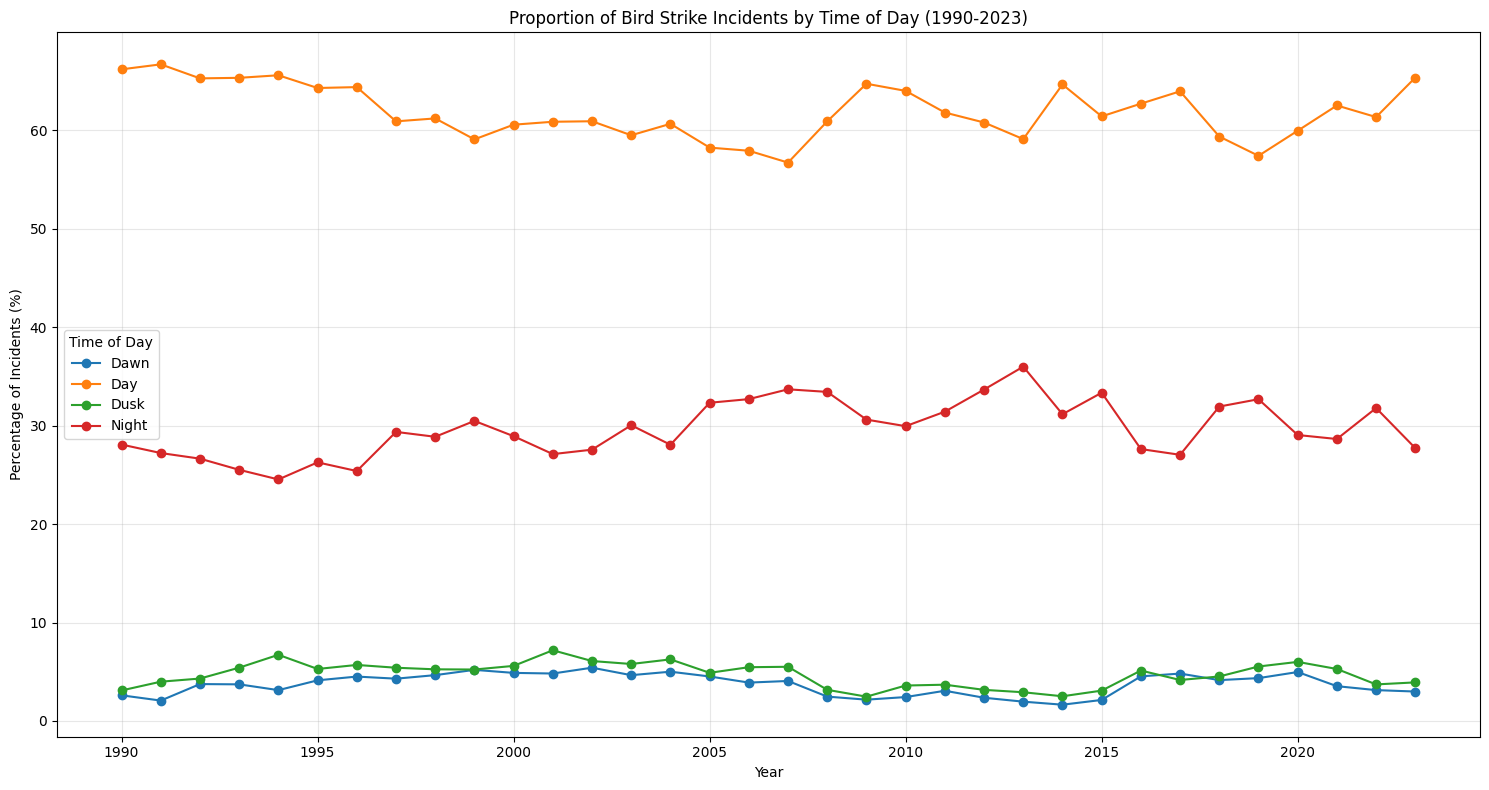

In [220]:

# Proportion of incidents by time of day for each year
time_prop = time_incidents.div(time_incidents.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
for time_of_day in time_prop.columns:
    plt.plot(time_prop.index, time_prop[time_of_day], marker='o', label=time_of_day)

plt.title('Proportion of Bird Strike Incidents by Time of Day (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage of Incidents (%)')
plt.legend(title='Time of Day')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [221]:
print("Average proportion of bird strikes by time of day:")
avg_prop = time_prop.mean().sort_values(ascending=False)
for time_of_day, prop in avg_prop.items():
    print(f"{time_of_day}: {prop:.2f}%")

Average proportion of bird strikes by time of day:
Day: 61.91%
Night: 29.68%
Dusk: 4.71%
Dawn: 3.71%


Day incidents consistently account for the majority of all bird strikes followed by night which is the second highest. Dawn and dusk seems to have very similar number of incidents and together only make up about 8 percent of all incidents. There's a noticeable dip in absolute numbers for all categories around 2020, likely due to reduced air traffic during the pandemic. Interestingly, the proportional distribution remained relatively stable during this period, suggesting the reduction affected all time periods similarly. The higher number of day incidents are likely due to the higher air traffic and more bird activity during the day.

## Question 4 — Hypothesis Testing (30 points)

Perform pairwise analysis of select features and evaluate the significance of the pattern or trend. A suitable value for alpha is 5%. Explain all results.

1. Create a scatterplot that shows the relationship between aircraft height and speed. Evaluate the correlation, the strength and the significance of the results.
2. Visualize the distribution of the aircraft speed during: 1) the approach phase of flight and 2) the landing roll phase of flight. Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. Tip: if the data is skewed, you will need to address this prior to the statistical analysis.
3. Create a visualization of the aircraft damage grouped by phase of flight.
    1. Evaluate if the results are statistically significant. Ensure that you use the appropriate test.
4. Perform ONE (1) additional statistical test.
    1. Explain what you are testing and the reason this information is useful.
    2. Visualize the data, state the hypothesis and explain if it is statistically significant.


In [222]:
#Write your python code to answer question 4. You can add new cells below as needed.

## Question 5 — Statistical Modeling (20 points)

Explore a simple linear relationship* within the data and create a model to predict the occurrence of bird strikes in a given FAA region. Ensure that you explain all results.

1. Extract all data for the AWP FAA Region and use a line chart to visualize the frequency of incidents between 1990 and 2015 inclusive.
2. Using the extracted data above, create a simple linear regression model and predicts the incidents for 2016 and 2017.
    1. Display the r-squared and what this indicates about your model's ability to fit the data.
    2. Visualize the dataset from (1) and include the predicted results for 2016 and 2017.
    3. Compare and contrast the predictions for 2016 and 2017 with the actual values.
3. Perform predictions for 2018 through to 2020. Explain what transpired when your model was used to predict this time period. Comment on the reliability of your model.

*Tip: It is important to remember that you are creating a simple linear regression model, which is limited in features and does not include information about all factors that influence the frequency of bird strikes. Keep this in mind while framing your response and explanations.



In [223]:
#Write your python code to answer question 5. You can add new cells below as needed.

## Question 6 — Summary

Summarize the overall analysis for questions 1 through 5 and share THREE (3) key findings.


Ans: Answer for question 6.

## Question 7 — OPTIONAL (10 points)

This optional bonus question requires that you perform a geospatial analysis on bird strikes and visualize the results using a map. Examples include (but you are not limited to):

* Mapping bird strike incidents: visualize the locations of bird strike incidents to identify hot spots or patterns
* Heat maps: create heat maps to show the density of bird strike incidents in different areas.
* Proximity Analysis: analyze the proximity of bird strikes to airports or landmarks
* etc
Ensure that you clearly indicate the analysis that you are performing and provide detailed steps to explain ALL findings from your analysis.

Note: a thorough analysis that demonstrates multiple patterns is required to earn full credit for this question.



## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
